# Cross section analysis
A cross section can often be analyzed (and often should be) on a larger model scale so see whether the numerical model makes sense.
The simplest way is to take a one-layer cross section between boundaries with fixed head fed by recharge and compare the course of the head with that of the numerical model.

$$ h = h_L + \frac {h_R - h_L}{L}\,x + \frac N {2kD}\,(Lx - x^2)$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import etc

def hx(hL=0., hR=10., N=0.002, kD=2000, L=20000):
    x = np.linspace(0, L, 2000)    
    h = hL + (hR - hL) / L * x + N / (2 * kD) * (L * x - x ** 2)
    return x, h 

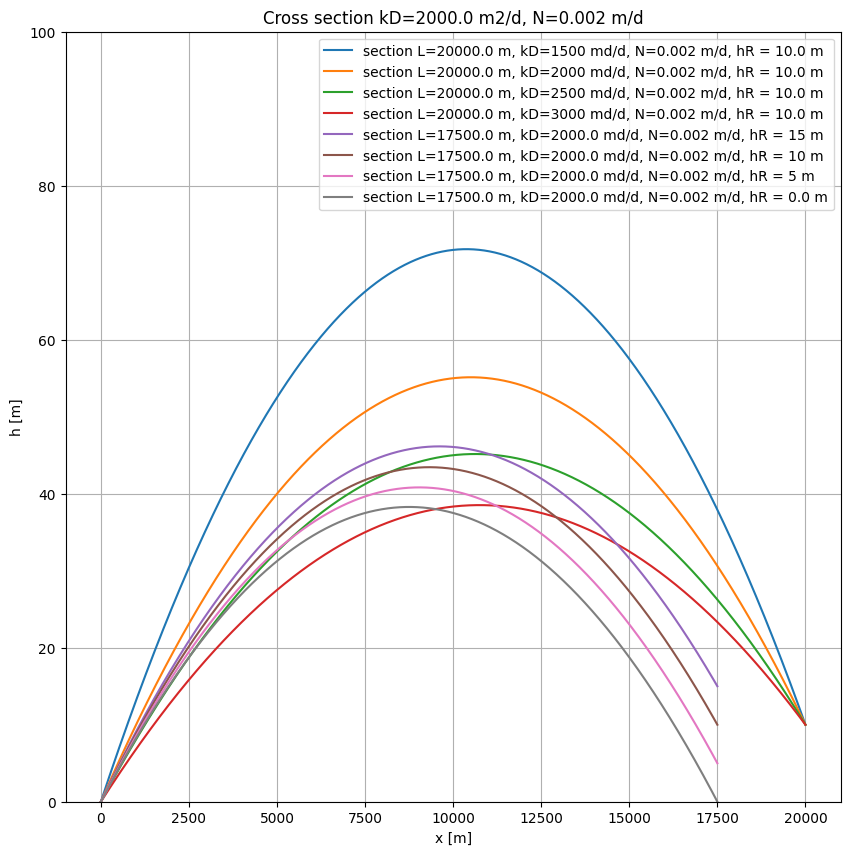

In [7]:
hL, hR, N, kD, L = 0., 10., 0.002, 2000., 20000.

x, h = hx(hL=hL, hR=hR, N=N, kD=kD, L=L)

fig, ax = plt.subplots()
ax.set_title(f"Cross section kD={kD} m2/d, N={N} m/d")
ax.set_xlabel("x [m]")
ax.set_ylabel("h [m]")
ax.grid(True)

for kD in [1500, 2000, 2500, 3000]:
    x, h = hx(hL=hL, hR=hR, N=N, kD=kD, L=L)
    ax.plot(x, h, label=f'section L={L} m, kD={kD} md/d, N={N} m/d, hR = {hR} m')
    
kD, L = 2000., 17500.
for hR in [15, 10, 5, 0.]:
    x, h = hx(hL=hL, hR=hR, N=N, kD=kD, L=L)
    ax.plot(x, h, label=f'section L={L} m, kD={kD} md/d, N={N} m/d, hR = {hR} m')

ax.set_ylim(0, 100)
fig.set_size_inches(10, 10)
ax.legend()

plt.show()
